In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.getcwd()
os.chdir('drive')
os.chdir('My Drive')
os.chdir('Janata')
os.listdir()
# os.listdir()

['train.csv', 'test.csv']

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

newdf = pd.read_csv('train.csv')

appendvr2newdf = pd.get_dummies(newdf['var2'],drop_first=True)
newdf = pd.concat([newdf.drop('var2',axis=1),appendvr2newdf], axis=1)

newdf['datetime'] = pd.to_datetime(newdf['datetime'])

newdf['day'] = newdf['datetime'].dt.day
newdf['month'] = newdf['datetime'].dt.month
newdf['year'] = newdf['datetime'].dt.year
newdf['time'] = newdf['datetime'].dt.time

newdf.drop('datetime',axis = 1,inplace = True)

newdf['hour'] = newdf['time'].apply(lambda x : x.hour)
newdf.drop('time',axis =1 , inplace = True)

appendvr2newdf = pd.get_dummies(newdf['month'],drop_first=True)
newdf = pd.concat([newdf.drop('month',axis=1),appendvr2newdf], axis=1)

appendvr2newdf = pd.get_dummies(newdf['year'],drop_first=True)
newdf = pd.concat([newdf.drop('year',axis=1),appendvr2newdf], axis=1)

appendvr2newdf = pd.get_dummies(newdf['hour'],drop_first=True)
newdf = pd.concat([newdf.drop('hour',axis=1),appendvr2newdf], axis=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

X = newdf.drop(['ID','electricity_consumption'],axis = 1)
y = newdf['electricity_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [6]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               5888      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 170,753
Trainable params: 170,753
Non-trainable params: 0
_________________________________________________________________


In [7]:
import tensorflow as tf

es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience =10, mode='min')

NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[es])


Epoch 1/500
464/464 [==============================] - 1s 3ms/step - loss: 76.7777 - mean_absolute_error: 76.7850 - val_loss: 74.5553 - val_mean_absolute_error: 74.5571
Epoch 2/500
464/464 [==============================] - 1s 2ms/step - loss: 68.4256 - mean_absolute_error: 68.4270 - val_loss: 71.7189 - val_mean_absolute_error: 71.7215
Epoch 3/500
464/464 [==============================] - 1s 3ms/step - loss: 65.9016 - mean_absolute_error: 65.8963 - val_loss: 63.6024 - val_mean_absolute_error: 63.6074
Epoch 4/500
464/464 [==============================] - 1s 3ms/step - loss: 64.7769 - mean_absolute_error: 64.7794 - val_loss: 61.7441 - val_mean_absolute_error: 61.7496
Epoch 5/500
464/464 [==============================] - 1s 3ms/step - loss: 63.4362 - mean_absolute_error: 63.4390 - val_loss: 61.1603 - val_mean_absolute_error: 61.1663
Epoch 6/500
464/464 [==============================] - 1s 3ms/step - loss: 62.8001 - mean_absolute_error: 62.7930 - val_loss: 60.5913 - val_mean_absolute_e

In [10]:
predictions = NN_model.predict(X_test)

from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 83.82760781602731


In [0]:
testdf = pd.read_csv('test.csv')

appendvr2testdf = pd.get_dummies(testdf['var2'],drop_first=True)
testdf = pd.concat([testdf.drop('var2',axis=1),appendvr2testdf], axis=1)

testdf['datetime'] = pd.to_datetime(testdf['datetime'])

testdf['day'] = testdf['datetime'].dt.day
testdf['month'] = testdf['datetime'].dt.month
testdf['year'] = testdf['datetime'].dt.year
testdf['time'] = testdf['datetime'].dt.time

testdf.drop('datetime',axis = 1,inplace = True)

testdf['hour'] = testdf['time'].apply(lambda x : x.hour)
testdf.drop('time',axis =1 , inplace = True)


appendvr2testdf = pd.get_dummies(testdf['month'],drop_first=True)
testdf = pd.concat([testdf.drop('month',axis=1),appendvr2testdf], axis=1)
appendvr2testdf = pd.get_dummies(testdf['year'],drop_first=True)
testdf = pd.concat([testdf.drop('year',axis=1),appendvr2testdf], axis=1)
appendvr2testdf = pd.get_dummies(testdf['hour'],drop_first=True)
testdf = pd.concat([testdf.drop('hour',axis=1),appendvr2testdf], axis=1)

In [0]:
X_test = testdf.drop(['ID'],axis = 1)

In [0]:
predictionstest = NN_model.predict(X_test)

In [0]:
submission = pd.DataFrame(predictionstest,columns=['electricity_consumption'])

finalsubmission = pd.concat([testdf[['ID']],submission],axis=1)

finalsubmission.to_csv('submission2.csv',index=False)

In [16]:
finalsubmission.head()

,ID,electricity_consumption
0,552,192.890244
1,553,187.077850
2,554,187.704636
3,555,183.594070
4,556,294.902252


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    LSTM(128,input_shape = (timesteps,num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences = True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))
])

model.compile(loss = 'mae', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [16]:
import tensorflow as tf

es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience =3, mode='min')

history = model.fit(
    X_train,y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.1,
    callbacks = [es],
    shuffle = False
)

Epoch 1/100
596/596 [==============================] - 4s 7ms/step - loss: 0.2261 - val_loss: 0.2252
Epoch 2/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1932 - val_loss: 0.2169
Epoch 3/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1902 - val_loss: 0.2189
Epoch 4/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1900 - val_loss: 0.2213
Epoch 5/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1903 - val_loss: 0.2165
Epoch 6/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1886 - val_loss: 0.2173
Epoch 7/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1892 - val_loss: 0.2174
Epoch 8/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1892 - val_loss: 0.2152
Epoch 9/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1886 - val_loss: 0.2156
Epoch 10/100
596/596 [==============================] - 4s 6ms/step - loss: 0.1883 - val_lo

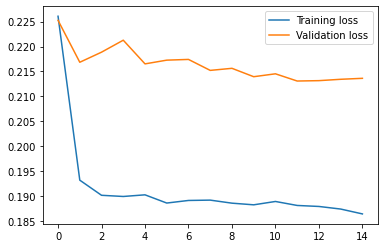

In [17]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend();

In [0]:
X_test_pred = model.predict(X_test)

In [36]:
X_test_pred[0][0]

array([-0.90597063], dtype=float32)

In [0]:
test_mae_loss = pd.DataFrame(np.sqrt(np.mean((X_test_pred - X_test)**2, axis = 1)))

In [30]:
test_mae_loss

,0
0,0.133288
1,0.124253
2,0.172725
3,0.145866
4,0.136450
...,...
5265,0.547775
5266,0.520482
5267,0.525362
5268,0.499872


In [31]:
model.evaluate(X_test,y_test)

165/165 [==============================] - 0s 3ms/step - loss: 0.1621


0.16213126480579376